In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [30]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

268
500


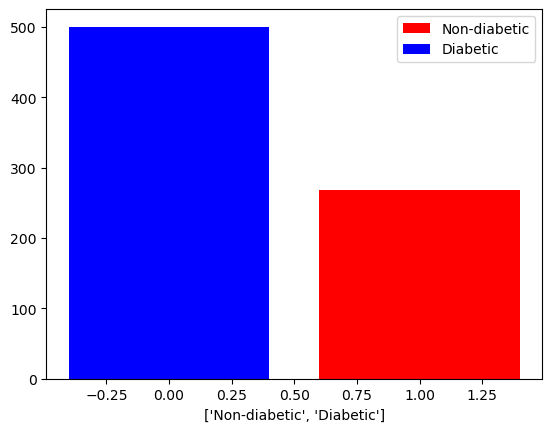

In [50]:

#class imbalance
ones = data[data["Outcome"]==1].shape[0]
zeros = data[data["Outcome"]==0].shape[0]
print(ones)
print(zeros)
plt.bar(data["Outcome"].unique(), [ones,zeros], label=["Non-diabetic","Diabetic"],color=["red","blue"])
plt.xlabel(["Non-diabetic","Diabetic"])
plt.legend()


In [31]:
x= data.drop("Outcome",axis=1)
y = data["Outcome"]

In [32]:
x_tr, x_test, y_tr, y_test = train_test_split(x,y,test_size=0.2)

In [33]:
# creating the input layer
input_layer = keras.Input(shape=[x.shape[1]])

In [34]:
#hiddenlayers
hl1 = Dense(6, activation="relu")
hl1 = hl1(input_layer)


In [35]:
hl2 = Dense(4, activation="relu")
hl2= hl2(hl1)


In [36]:
output_layer = Dense(1, activation="relu")
output_layer= output_layer(hl2)

In [37]:
model = keras.Model(inputs= input_layer, outputs= output_layer)

In [38]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87 (348.00 B)

 Trainable params: 87 (348.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
keras_earlystop = keras.callbacks.EarlyStopping(monitor="loss", mode="min", patience=3)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_tr,y_tr, epochs=100, callbacks=[keras_earlystop])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.6420 - loss: 5.7172
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6273 - loss: 5.9912
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6527 - loss: 5.5426
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6403 - loss: 5.6559
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6352 - loss: 5.8215
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6519 - loss: 5.4323
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.6362 - loss: 5.8186
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6508 - loss: 5.5757
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6631 - loss: 5.4163
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6161 - loss: 6.1710
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.6584 - loss: 5.4908


In [40]:
model.evaluate(x_tr,y_tr)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.6554 - loss: 5.5367


[5.758902072906494, 0.6416938304901123]

In [41]:
p_tr = model.predict(x_tr)
p_test = model.predict(x_test)
p_test[0:10]

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step


array([[0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [4.2503653],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ]], dtype=float32)

In [42]:
p_list =[ 0 if i <0.5 else 1 for i in p_test ]

print(p_list)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]


In [43]:
print(classification_report(y_test, p_list))
print(confusion_matrix(y_test,p_list))

              precision    recall  f1-score   support

           0       0.62      0.79      0.69        98
           1       0.30      0.16      0.21        56

    accuracy                           0.56       154
   macro avg       0.46      0.47      0.45       154
weighted avg       0.50      0.56      0.52       154

[[77 21]
 [47  9]]
